# Segunda entrega German Koning


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

## Calidad del aire

In [148]:
dfAir = pd.read_csv("./AirQualityUCI.csv", delimiter=';')

## Filtrar los datos

In [149]:
# Eliminar columnas no relevantes para el análisis
columns_to_drop = ['Unnamed: 15', 'Unnamed: 16','C6H6(GT)','T','RH','AH' ]
dfAir_filtered = dfAir.drop(columns=columns_to_drop)
# Eliminar filas con valores nulos en 'CO(GT)'
dfAir_filtered = dfAir_filtered.dropna(subset=['CO(GT)'])

# Suponiendo que 'Date' y 'Time' están en formato 'dd/mm/yyyy' y 'hh.mm.ss' respectivamente
dfAir_filtered['Datetime'] = pd.to_datetime(dfAir_filtered['Date'] + ' ' + dfAir_filtered['Time'], format='%d/%m/%Y %H.%M.%S')

# Luego, establecer la columna 'Datetime' como el nuevo índice
dfAir_filtered.set_index('Datetime', inplace=True)



# Convertir 'PT08.S1(CO)' a tipo numérico si no lo está en este momento
dfAir_filtered['PT08.S1(CO)'] = pd.to_numeric(dfAir_filtered['PT08.S1(CO)'], errors='coerce')

# Eliminar filas donde 'PT08.S1(CO)' es menor a 500
dfAir_filtered = dfAir_filtered[dfAir_filtered['PT08.S1(CO)'] >= 500]

# Mostrar estadísticas después de eliminar la
dfAir_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8991 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8991 non-null   object 
 1   Time           8991 non-null   object 
 2   CO(GT)         8991 non-null   object 
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        8991 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        8991 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
dtypes: float64(8), object(3)
memory usage: 842.9+ KB


| Columna           | Descripción                                                             |
|-------------------|-------------------------------------------------------------------------|
| Date              | Fecha                                                                   |
| Date (DD/MM/YYYY) | Fecha (DD/MM/YYYY)                                                      |
| Time              | Hora                                                                    |
| Time (HH.MM.SS)   | Hora (HH.MM.SS)                                                         |
| CO(GT)            | Concentración promedio verdadera de CO en mg/m³ (analizador de referencia)|
| PT08.S1(CO)       | Respuesta del sensor PT08.S1 (óxido de estaño) promediada por hora (objetivo nominalmente CO)|
| NMHC(GT)          | Concentración de Hidrocarburos No Metánicos en microg/m³ (analizador de referencia)|
| PT08.S2(NMHC)     | Respuesta del sensor PT08.S2 (titania) promediada por hora (objetivo nominalmente NMHC)|
| NOx (GT)          | Concentración promedio verdadera de NOx en ppb (analizador de referencia)|
| PT08.S3(NOx)      | Respuesta del sensor PT08.S3 (óxido de tungsteno) promediada por hora|
| NO2(GT)           | Concentración promedio verdadera de NO2 en microg/m³ (analizador de referencia)|
| PT08.S4(NO2)      | Respuesta del sensor PT08.S4 (óxido de tungsteno) promediada por hora|
| PT08.S5(O3)       | Respuesta del sensor PT08.S5 (óxido de indio) promediada por hora (objetivo nominalmente O3)|


## Variables de interés en el dataset:

1. **Date y Time:**
   - Estas columnas representan la fecha y la hora de las observaciones. Son fundamentales para análisis temporales. En el contexto comercial, el análisis temporal podría ser crucial para identificar tendencias estacionales, cambios a lo largo del tiempo y patrones en el comportamiento de los datos.

2. **CO(GT), NMHC(GT), C6H6(GT), NOx(GT), NO2(GT):**
   - Estas columnas contienen mediciones de diferentes compuestos químicos en el aire. En un contexto analítico, estas variables podrían ser de interés para comprender la calidad del aire y su impacto en la salud pública. Comprender las fluctuaciones de estos compuestos a lo largo del tiempo podría ser crucial para tomar medidas preventivas o correctivas en ciertos lugares.



##  Gráfico de serie temporal para la concentración de dióxido de nitrógeno NOx(GT) a lo largo del tiempo:

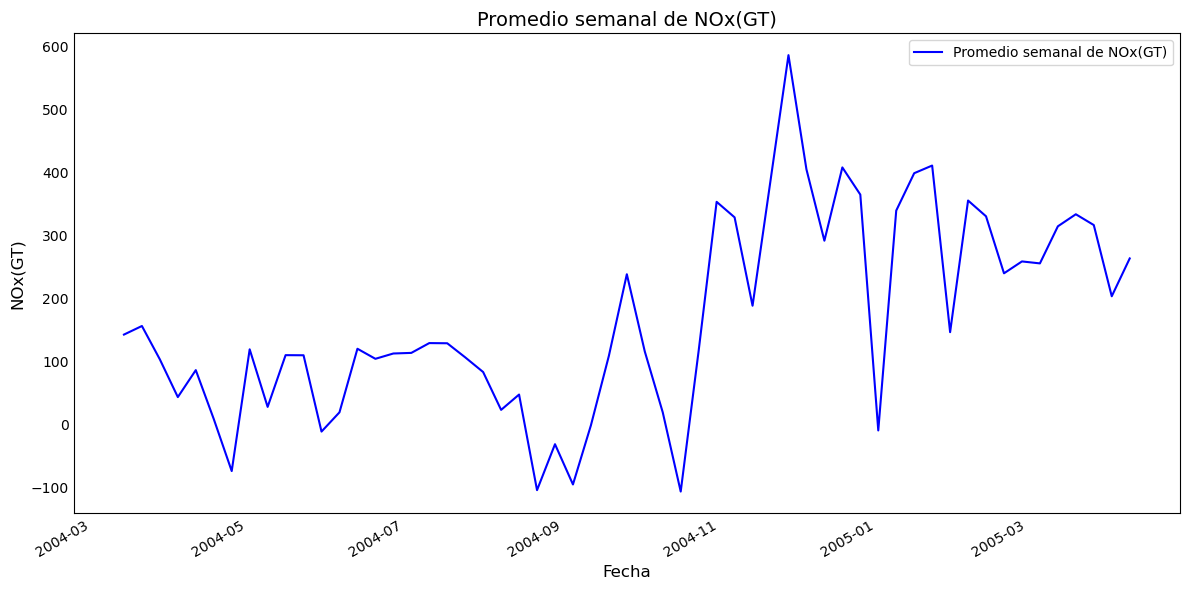

In [150]:
# Convertir la columna 'Date' y 'Time' a formato de fecha y hora
dfAir_filtered['DateTime'] = pd.to_datetime(dfAir_filtered['Date'] + ' ' + dfAir_filtered['Time'], format='%d/%m/%Y %H.%M.%S')

# Establecer la columna 'DateTime' como el índice del DataFrame
dfAir_filtered.set_index('DateTime', inplace=True)

# Agrupar por semana y calcular el promedio semanal de 'NOx(GT)'
weekly_average_nox = dfAir_filtered['NOx(GT)'].resample('W').mean()

# Crear un rango de incertidumbre (por ejemplo, desviación estándar)
uncertainty = 0.2  # Modifica este valor según el rango de incertidumbre que desees representar

# Calcular límites superior e inferior para la sombra
upper_bound_nox = weekly_average_nox + uncertainty
lower_bound_nox = weekly_average_nox - uncertainty

# Gráfico con sombra representando la incertidumbre
plt.figure(figsize=(12, 6))

# Línea principal (promedio semanal de NOx(GT))
plt.plot(weekly_average_nox.index, weekly_average_nox, color='blue', label='Promedio semanal de NOx(GT)')

# Etiquetas y título del gráfico
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('NOx(GT)', fontsize=12)
plt.title('Promedio semanal de NOx(GT)', fontsize=14)

# Añadir leyenda
plt.legend()

# Formato de fechas en el eje x
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## gráfico de dispersión que muestra la relación entre Proporción de CO(GT), NMHC(GT), NOx(GT) y NO2(GT):

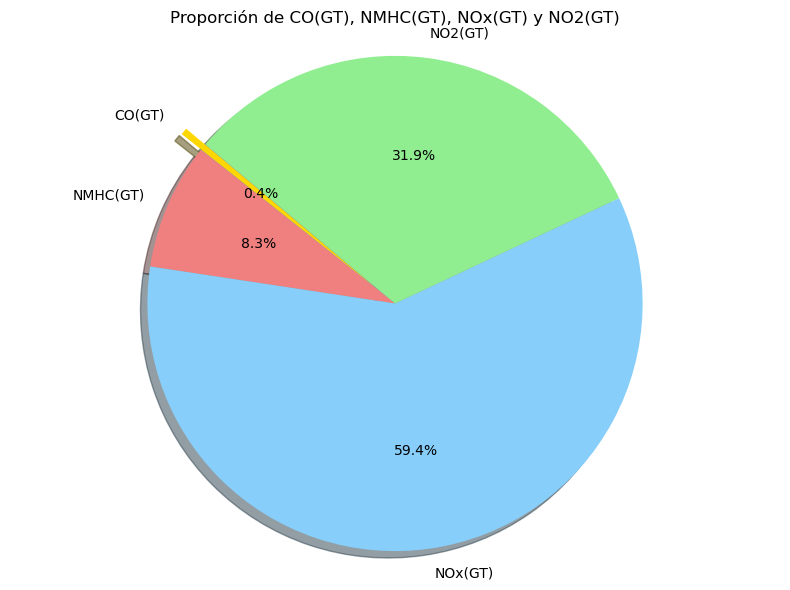

In [153]:
# Seleccionar las columnas de interés presentes en tu DataFrame
columns_of_interest = ['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']

# Convertir los valores a tipo numérico (puede haber valores no numéricos)
dfAir_filtered[columns_of_interest] = dfAir_filtered[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos (NaN) que podrían haberse generado en la conversión
dfAir_filtered.dropna(subset=columns_of_interest, inplace=True)

# Asegurar que todos los valores sean no negativos
dfAir_filtered[columns_of_interest] = dfAir_filtered[columns_of_interest].clip(lower=0)

# Calcular sumas de valores para cada columna
sum_values = dfAir_filtered[columns_of_interest].sum()

# Crear una figura de gráfico de torta
plt.figure(figsize=(8, 6))

# Configurar colores y explotar la porción más grande
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0, 0)  # explotar la primera porción (CO(GT))

# Graficar el gráfico de torta
plt.pie(sum_values, labels=sum_values.index, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Añadir título
plt.title('Proporción de CO(GT), NMHC(GT), NOx(GT) y NO2(GT)')

# Mostrar el gráfico
plt.axis('equal')  # Hace que el gráfico sea circular
plt.tight_layout()
plt.show()

## Grafico de variacion de NOx en razon del tiempo

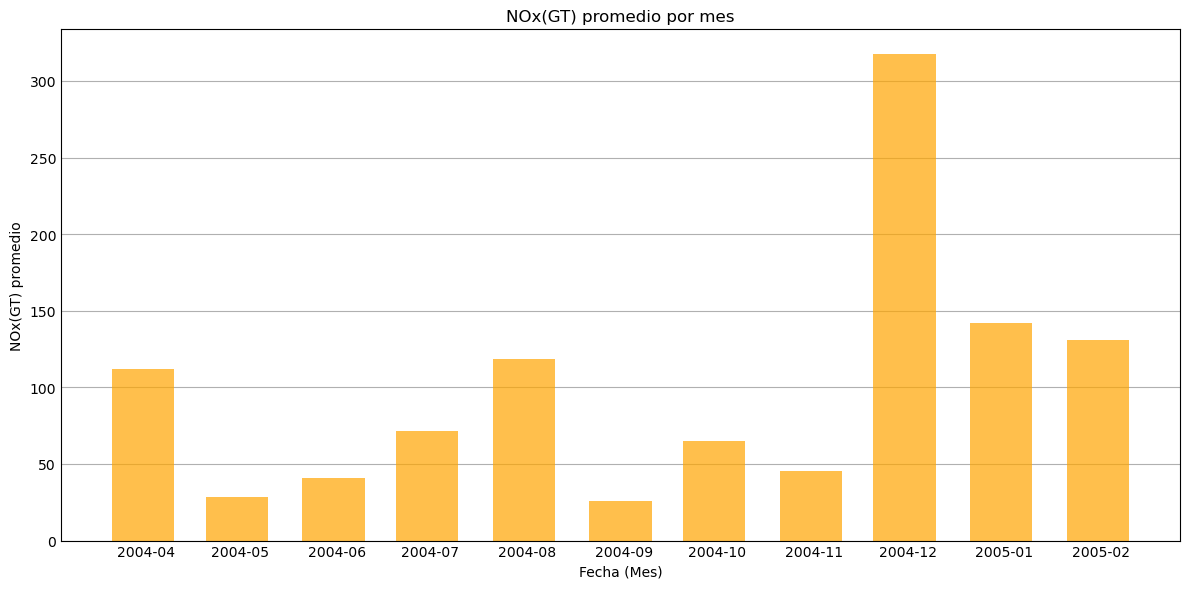

In [152]:
# Convertir la columna 'Date' y 'Time' a formato de fecha y hora
dfAir_filtered['DateTime'] = pd.to_datetime(dfAir_filtered['Date'] + ' ' + dfAir_filtered['Time'], format='%d/%m/%Y %H.%M.%S')

# Establecer la columna 'DateTime' como el índice del DataFrame
dfAir_filtered.set_index('DateTime', inplace=True)

# Filtrar los valores menores a cero en la columna 'NOx(GT)'
df_filtered = dfAir_filtered[dfAir_filtered['NOx(GT)'] >= 0]

# Agrupar por mes y calcular la media de 'NOx(GT)'
monthly_data = df_filtered['NOx(GT)'].resample('M').mean()

# Graficar NOx(GT) con barras agrupadas por mes
plt.figure(figsize=(12, 6))
plt.bar(monthly_data.index, monthly_data, color='orange', alpha=0.7, width=20)
plt.title('NOx(GT) promedio por mes')
plt.xlabel('Fecha (Mes)')
plt.ylabel('NOx(GT) promedio')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Graficos con Seaborn

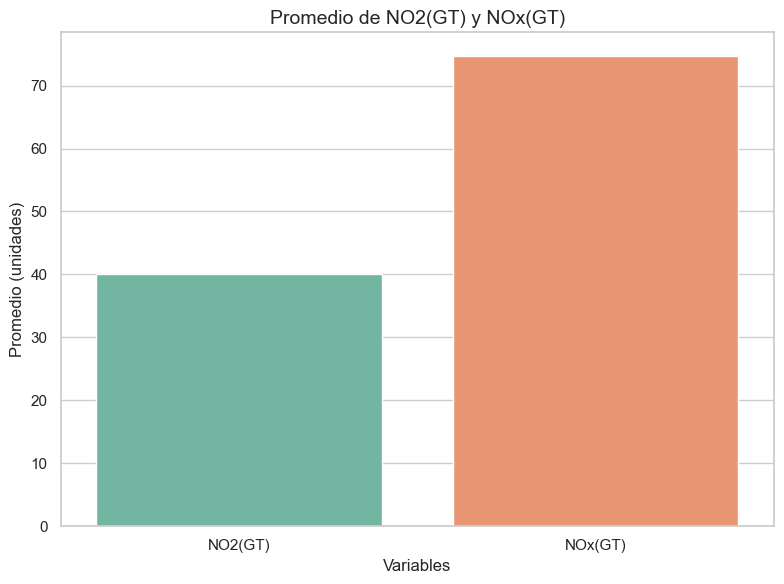

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
relevant_columns = dfAir_filtered[['NO2(GT)', 'NOx(GT)']]

# Calcular el promedio de cada columna
average_values = relevant_columns.mean()

# Crear un gráfico de barras para los promedios
plt.figure(figsize=(8, 6))
sns.barplot(x=average_values.index, y=average_values.values, palette="Set2")

# Configurar etiquetas y título
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Promedio (unidades)', fontsize=12)  # Cambia 'unidades' por la unidad real
plt.title('Promedio de NO2(GT) y NOx(GT)', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Relacion entre NO2(GT) y NOx(GT)

## Promedio de variables

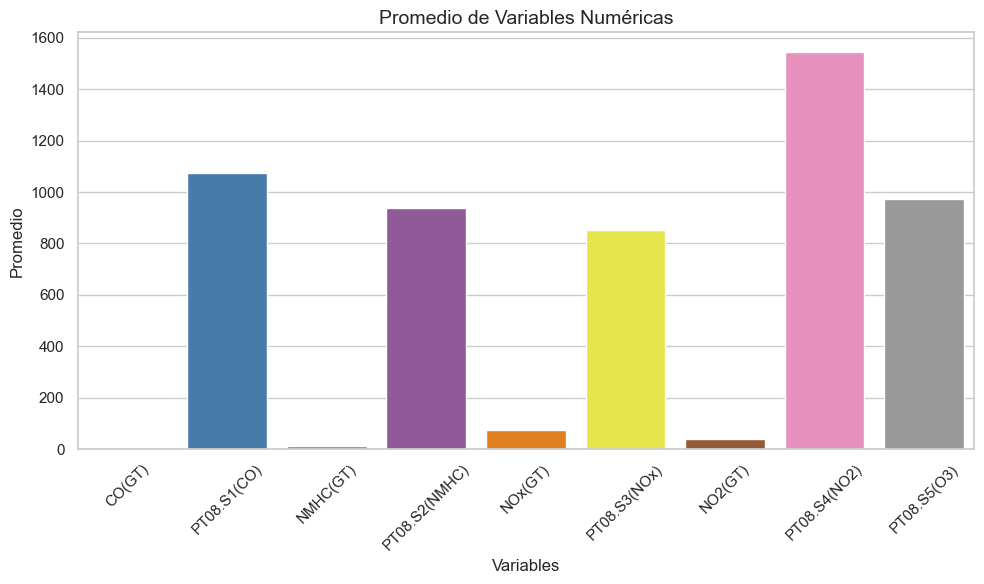

In [160]:
# Filtrar columnas numéricas
numeric_columns = dfAir_filtered.select_dtypes(include=['float64', 'int64'])

# Calcular el promedio de cada variable
average_values = numeric_columns.mean()

# Crear un gráfico de barras para los promedios
plt.figure(figsize=(10, 6))
sns.barplot(x=average_values.index, y=average_values.values, palette="Set1")

# Agregar etiquetas y título
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Promedio', fontsize=12)
plt.title('Promedio de Variables', fontsize=14)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()